<a href="https://colab.research.google.com/github/IAMLATI/Demo-Repo2/blob/master/Data_Analysis_Google_Play_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/googleplaystore.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
df.duplicated().sum()

483

In [ ]:
df.shape

(10841, 13)

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df[-df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df_copy=df.copy()

In [ ]:
df_copy=df_copy.drop(df_copy.index[10472])

In [ ]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [ ]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
df_copy['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
df_copy[df_copy['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
df_copy['Size']=df_copy['Size'].str.replace('M', '000')
df_copy['Size']=df_copy['Size'].str.replace('k', '')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.4+ MB


In [ ]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
  for cols in cols_to_clean:
    df_copy[cols]=df_copy[cols].str.replace(item,'')

In [ ]:
df_copy['Installs']=df_copy['Installs'].astype(float)


In [ ]:
df_copy['Price']=df_copy['Price'].astype(float)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [ ]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])

In [ ]:
df_copy['Last_Updated_day']=df_copy['Last Updated'].dt.day
df_copy['Last_Updated_month']=df_copy['Last Updated'].dt.month
df_copy['Last_updated_year']=df_copy['Last Updated'].dt.year

In [ ]:
df_copy.drop("Last Updated", axis=1, inplace=True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10840 non-null  object 
 1   Category            10840 non-null  object 
 2   Rating              9366 non-null   float64
 3   Reviews             10840 non-null  int64  
 4   Size                9145 non-null   float64
 5   Installs            10840 non-null  float64
 6   Type                10839 non-null  object 
 7   Price               10840 non-null  float64
 8   Content Rating      10840 non-null  object 
 9   Genres              10840 non-null  object 
 10  Current Ver         10832 non-null  object 
 11  Android Ver         10838 non-null  object 
 12  Last_Updated_day    10840 non-null  int32  
 13  Last_Updated_month  10840 non-null  int32  
 14  Last_updated_year   10840 non-null  int32  
dtypes: float64(4), int32(3), int64(1), object(7)
memory usage:

In [ ]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated_day,Last_Updated_month,Last_updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [ ]:
df_copy.duplicated('App').sum()

1181

In [ ]:
df_copy[df_copy.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated_day,Last_Updated_month,Last_updated_year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000.0,Free,0.0,Everyone,Business,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000.0,Free,0.0,Everyone,Business,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000.0,Free,0.0,Everyone,Business,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000.0,Free,0.0,Everyone,Business,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000.0,Free,0.0,Everyone,Business,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000.0,Free,0.0,Mature 17+,Dating,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000.0,Free,0.0,Everyone,Communication,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000.0,Free,0.0,Everyone,Medical,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000.0,Free,0.0,Everyone,Shopping,3.9,4.4 and up,30,7,2018


In [ ]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [ ]:
df_copy.shape

(9659, 15)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 9659 non-null   object 
 1   Category            9659 non-null   object 
 2   Rating              8196 non-null   float64
 3   Reviews             9659 non-null   int64  
 4   Size                8432 non-null   float64
 5   Installs            9659 non-null   float64
 6   Type                9658 non-null   object 
 7   Price               9659 non-null   float64
 8   Content Rating      9659 non-null   object 
 9   Genres              9659 non-null   object 
 10  Current Ver         9651 non-null   object 
 11  Android Ver         9657 non-null   object 
 12  Last_Updated_day    9659 non-null   int32  
 13  Last_Updated_month  9659 non-null   int32  
 14  Last_updated_year   9659 non-null   int32  
dtypes: float64(4), int32(3), int64(1), object(7)
memory usage: 

In [ ]:
numerical_features=[feature for feature in df_copy.columns if df_copy[feature].dtype !='object']


In [ ]:
Categorical_features=[feature for feature in df_copy.columns if df_copy[feature].dtype=='object']

In [ ]:
numerical_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last_Updated_day',
 'Last_Updated_month',
 'Last_updated_year']

In [ ]:
Categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [ ]:
for col in Categorical_features:
  print(df[col].value_counts(normalize=True)*100)
  print('-----------------------------')

App
ROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
ESPN                                                  0.064570
Duolingo: Learn Languages Free                        0.064570
Candy Crush Saga                                      0.064570
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009224
U-Report                                              0.009224
U of I Community Credit Union                         0.009224
Waiting For U Launcher Theme                          0.009224
iHoroscope - 2018 Daily Horoscope & Astrology         0.009224
Name: proportion, Length: 9660, dtype: float64
-----------------------------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION    

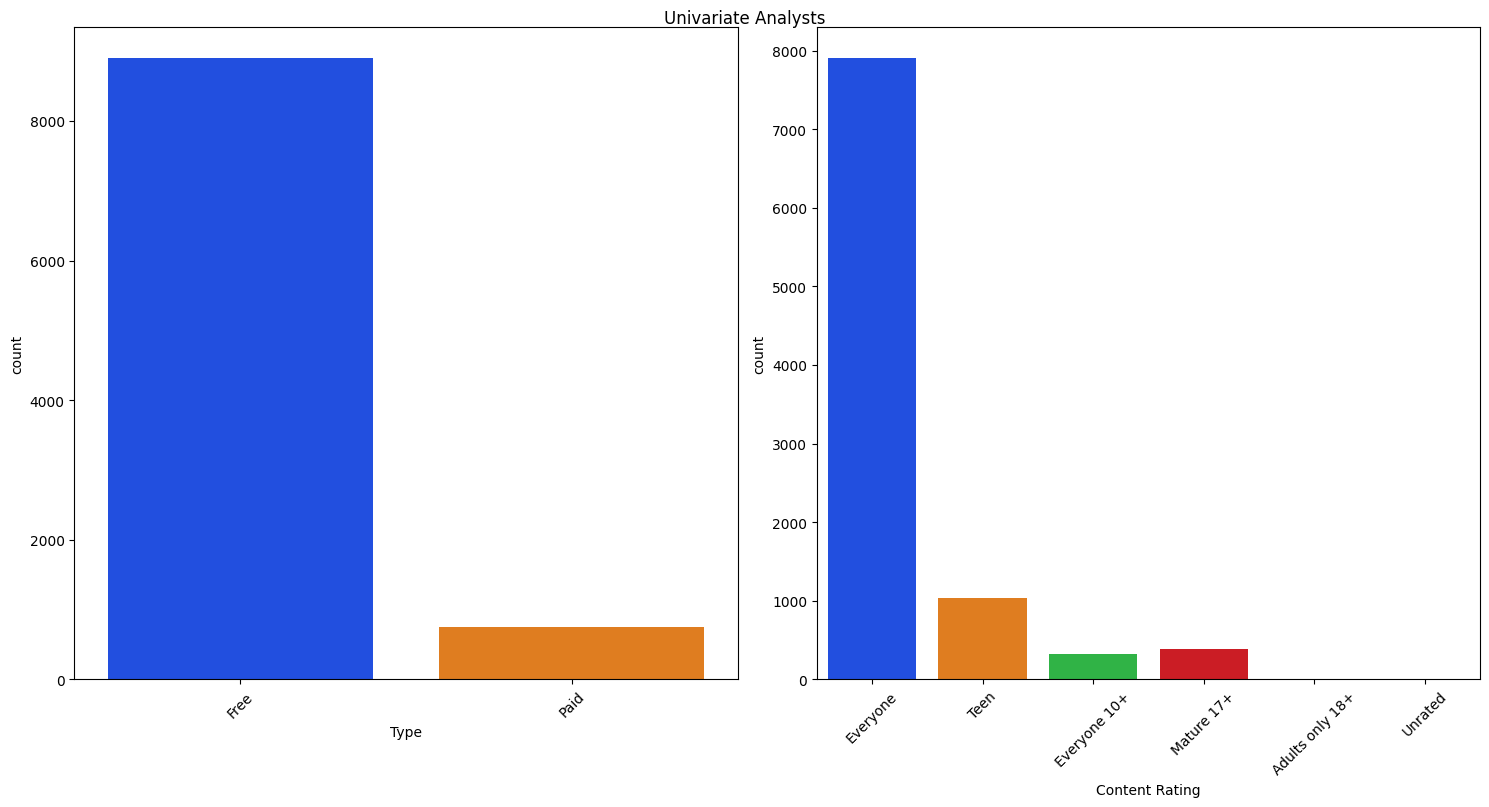

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysts")
catergory=['Type', 'Content Rating']
for i in range(0, len(catergory)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=df_copy[catergory[i]], palette='bright')
  plt.xlabel(catergory[i])
  plt.xticks(rotation=45)
  plt.tight_layout()


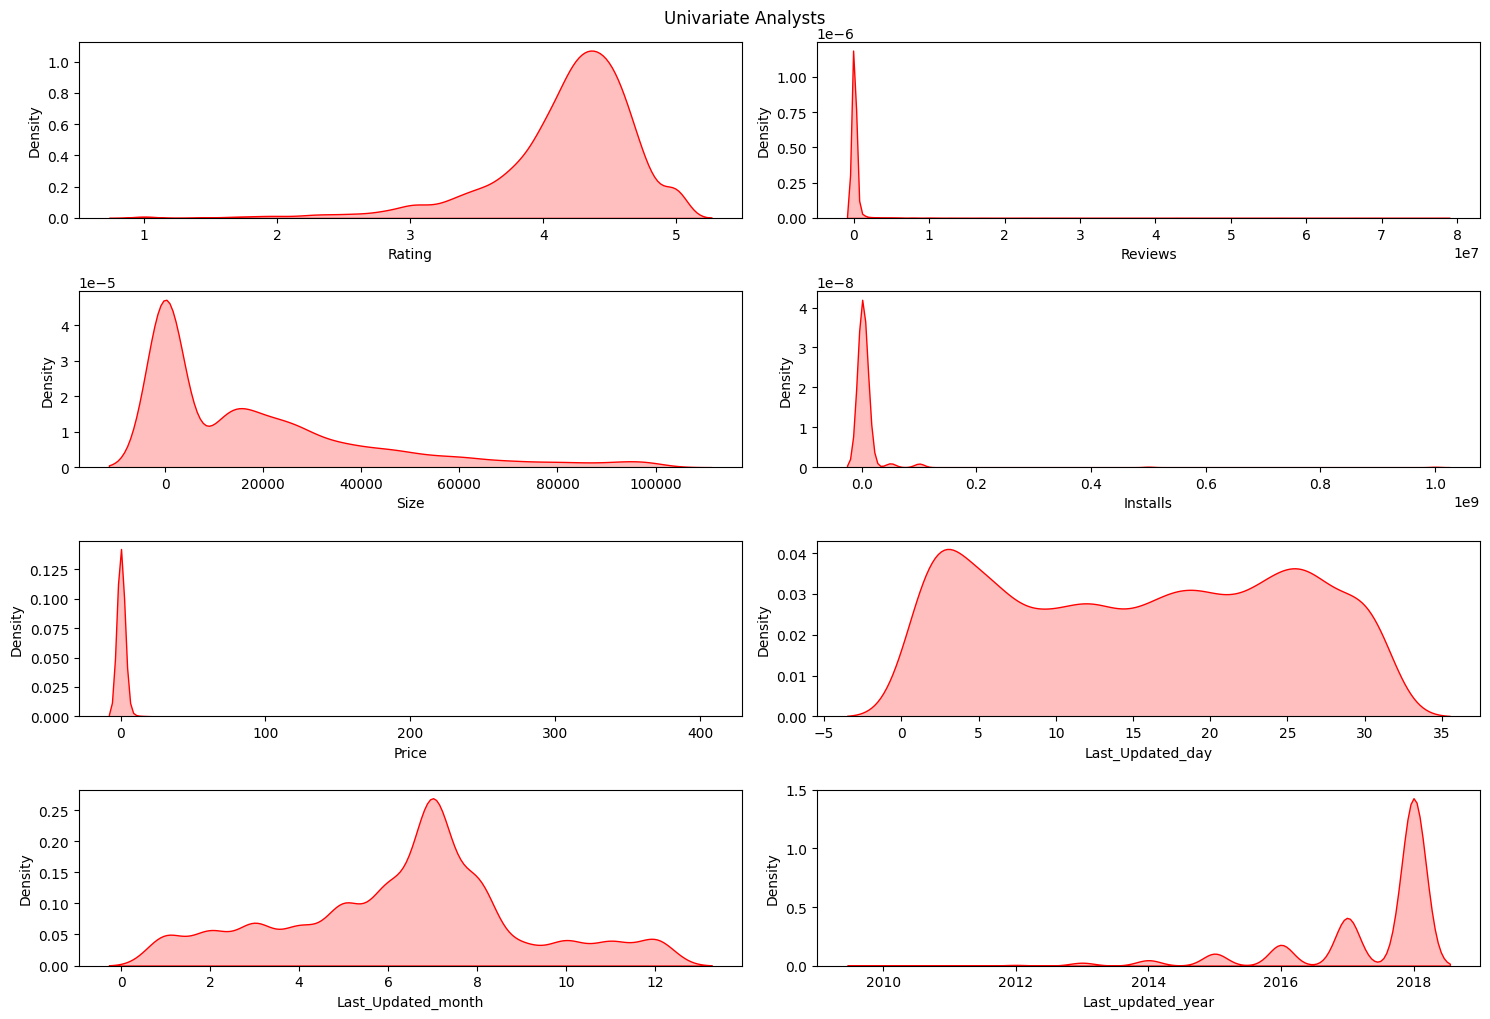

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysts")

for i in range(0, len(numerical_features)):
  plt.subplot(6,2,i+1)
  sns.kdeplot(x=df_copy[numerical_features[i]], shade=True,color='red')
  plt.xlabel(numerical_features[i])
  plt.tight_layout()


<Axes: ylabel='count'>

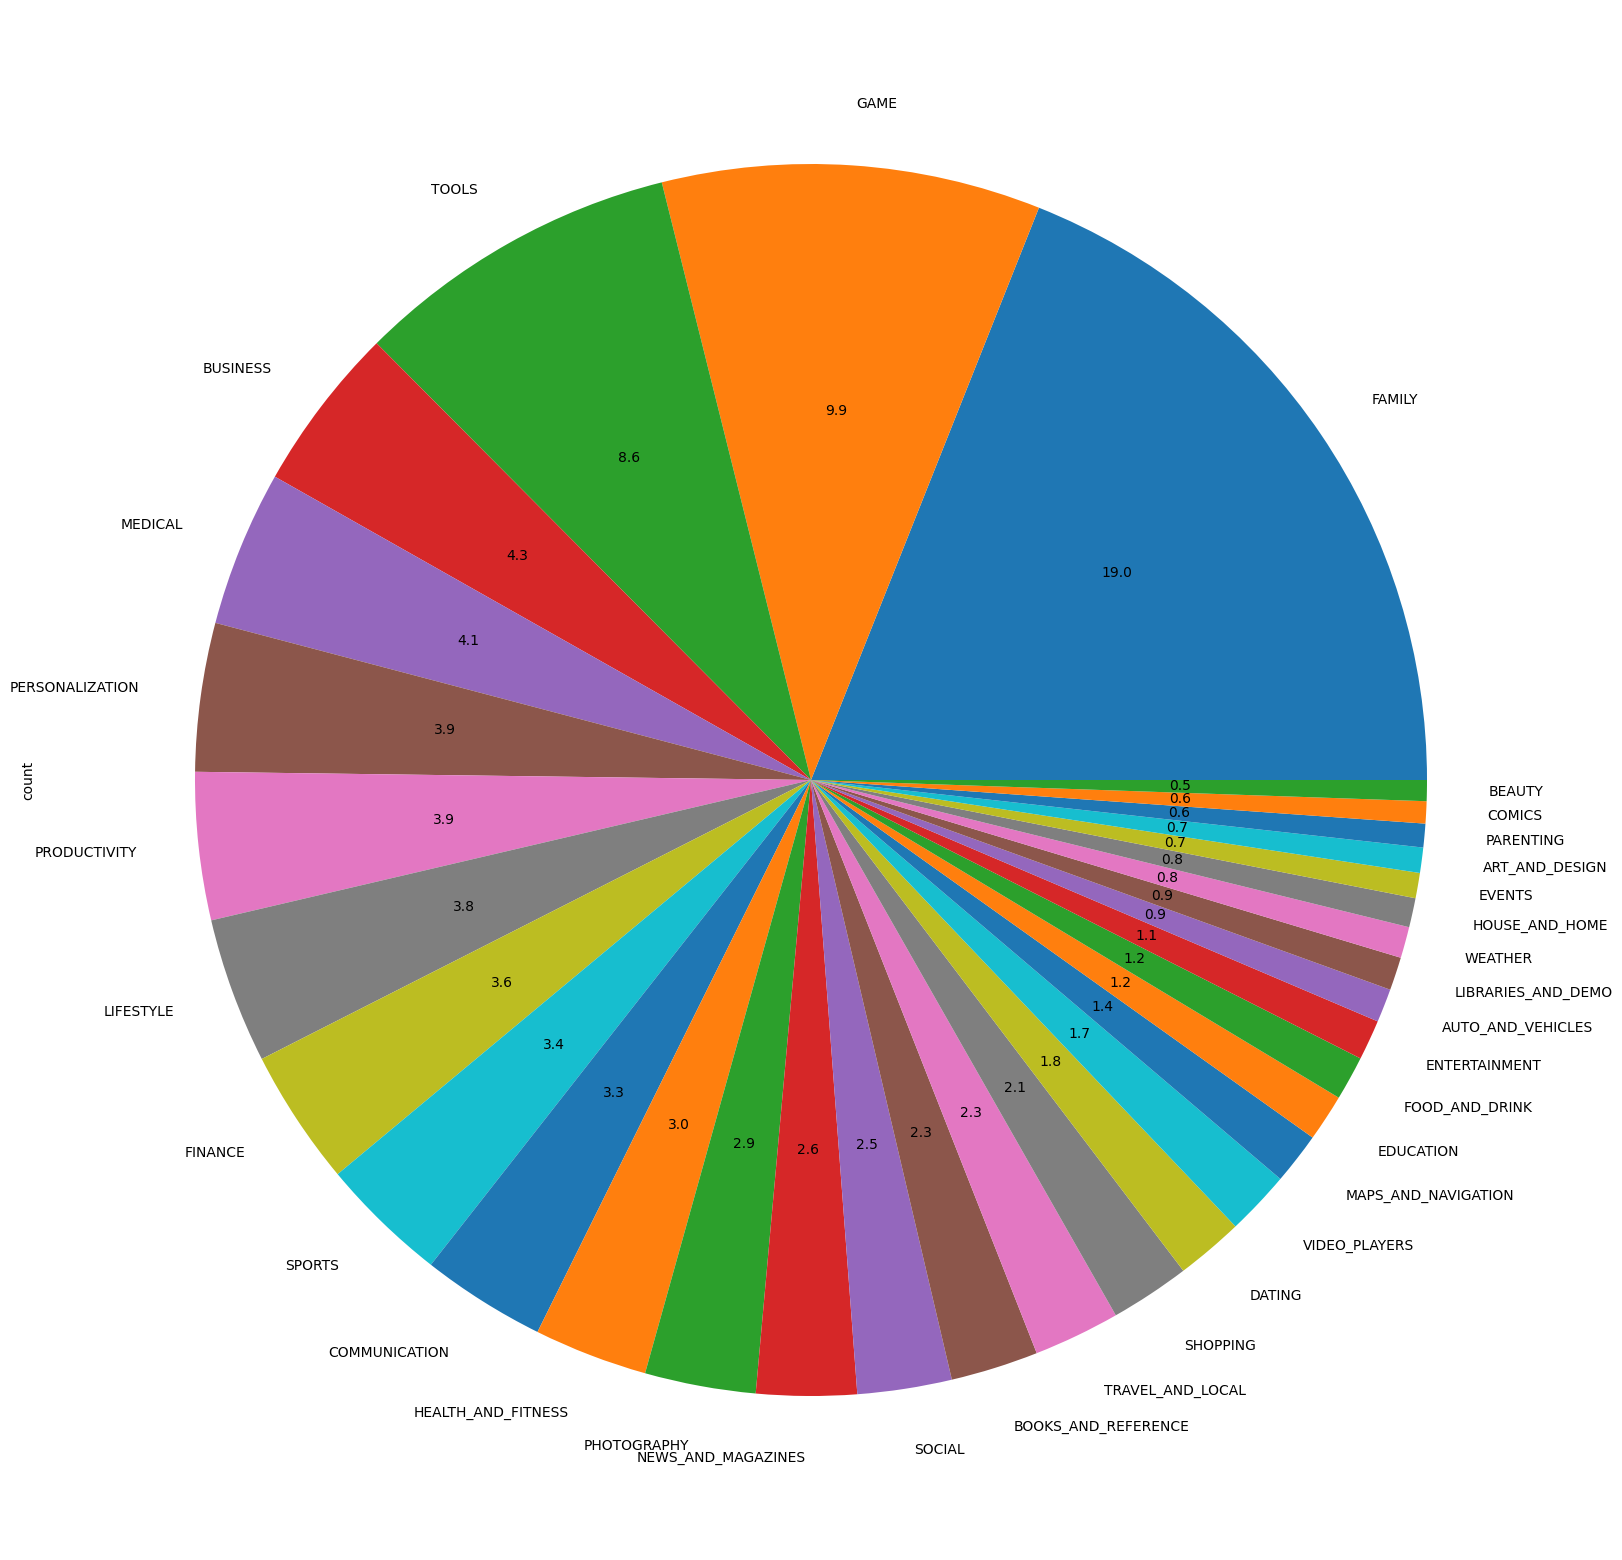

In [ ]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'], figsize=(20,20), autopct='%1.1f'  )

In [ ]:
category=pd.DataFrame(df['Category'].value_counts())

In [ ]:
category.rename(columns={'Category':'Count'},inplace=True)

In [ ]:
category.columns

Index(['count'], dtype='object')

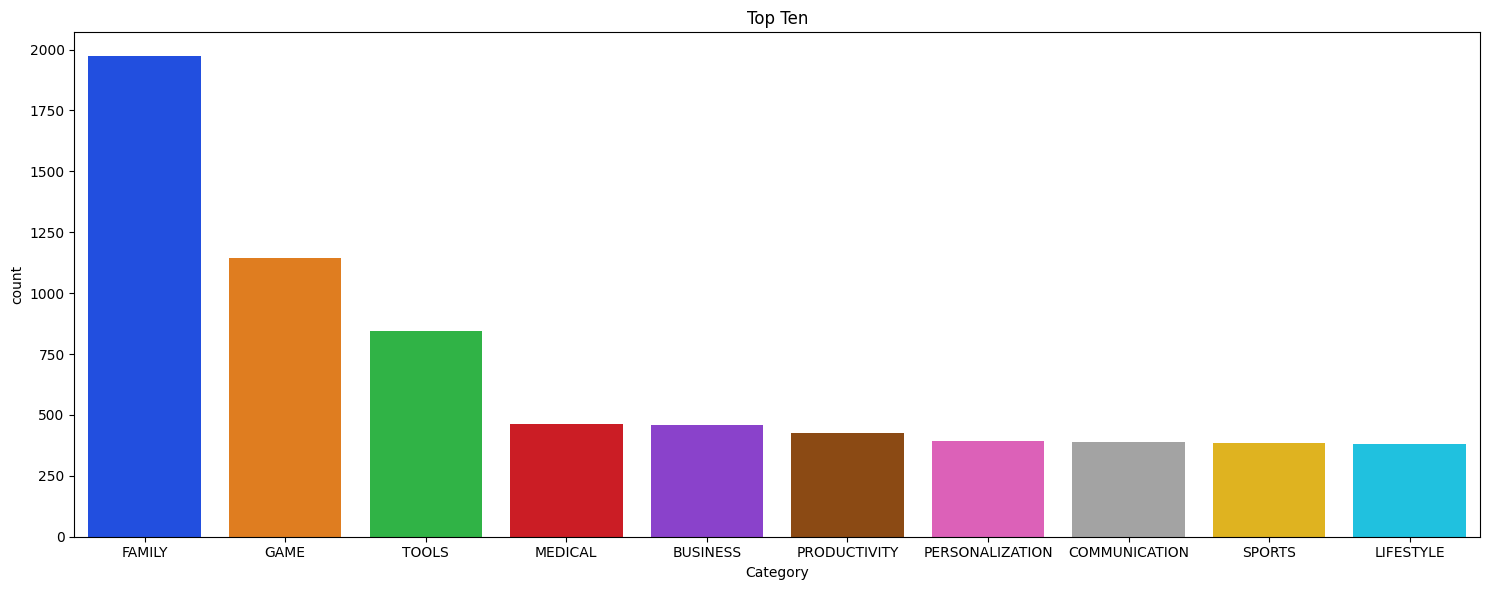

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10],y='count', data=category[:10], palette='bright' )
plt.title('Top Ten')
plt.tight_layout()
plt.show()